Sklearn에서 제공하는 캘리포니아 집값 예측 데이터셋을 선형 회귀 모델로 학습시키면 각 특성과 주택 가격 간의 연관성을 파악할 수 있다. 선형 회귀 모델은 훈련 데이터에 대한 손실 함수를 최소화하여 가중치와 절편을 찾는 과정을 통해 학습한다. 주로 사용하는 손실 함수는 평균 제곱 오차(MSE)이며 훈련 데이터에 존재하는 특성에 대한 가중치를 구해 집값에 영향을 미치는 정도를 확인할 수 있다.

In [1]:
# data import 
from sklearn.datasets import fetch_california_housing

# load dataset 
housing = fetch_california_housing(as_frame=True) 
# as_frame=True: Pandas data frame
# as_frame=False: numpy data frame

housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- fetch_california_housing(): import된 캘리포니아 집값 훈련 데이터를 가져온다. 파라미터에 as_frame을 True로 설정하면 data와 target을 pandas dataframe 형식으로 데이터를 가져온다. as_frame을 False로 설정하면 numpy 형식으로 데이터를 가져온다.

- frame: 데이터 프레임을 볼 수 있게 해준다. as_frame=True로 설정하지 않으면 해당 데이터 프레임이 존재하지 않는다.

- head(): 데이터 프레임의 상위 5개 행을 출력한다.

#### 데이터 특성 확인
- info(): frame과는 다르게 칼럼명과 데이터 타입을 보여준다. 또한 Null 또는 NaN이 아닌 값의 수를 표시한다. Null, Nan은 결측값으로 데이터셋에 누락된 데이터를 나타낸다.

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### 히스토그램
각 특성에 따른 데이터의 분포를 히스토그램을 통해 확인하여 대략적으로 데이터를 분석할 수 있다.
- bins: 히스토그램의 세밀도를 조절할 수 있는 옵션이다. bins의 수를 늘리면 더 넓은 범위로 볼 수 있어 전반적인 분포를 확인할 수 있으며 bin의 수를 줄이면 더 세밀하게 분석할 수 있다.

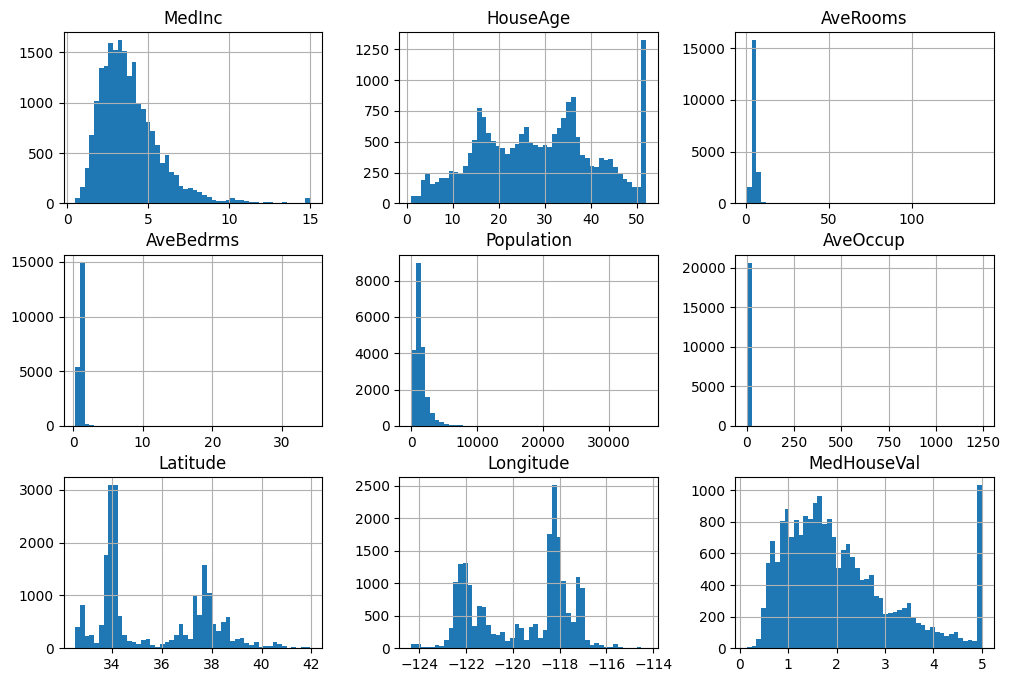

In [3]:
import matplotlib.pyplot as plt 
housing.hist(bins=50,figsize=(12,8)) 
plt.show()

#### 상관관계 분석
데이터의 분포 이외에도 데이터 특성들과 타겟 데이터인 집값과의 상관 관계를 분석할 수 있다. 상관 관계를 나타내는 상관 계수가 높으면 두 변수에 강한 연관성이 있다고 판단할 수 있다.

- corr(): pandas 프레임으로 된 데이터에서 각 열 간의 상관 관계를 반환하는 메서드다.
- sns.heatmap(): 상관 관계를 바탕으로 히트맵을 출력해준다. 히트맵은 corr_matrix에 속해있는 상관 관계를 열의 농도를 통해 표현한다.

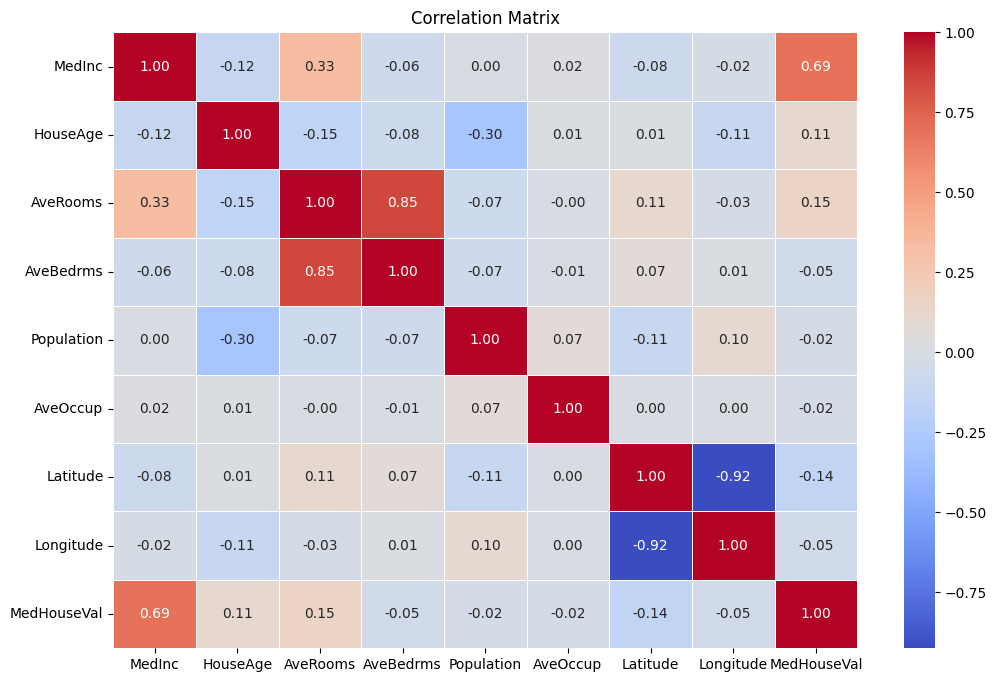

In [5]:
# correlation matrix 
import pandas as pd 
import seaborn as sns 

housing = fetch_california_housing() 
data = pd.DataFrame(housing.data, columns=housing.feature_names) # 컬럼명: 데이터 특정 이름 
data['MedHouseVal'] = housing.target # target: MedHouseVal

corr_matrix = data.corr() 
plt.figure(figsize=(12,8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # 히트맵 표시
plt.title('Correlation Matrix') 
plt.show()

히트맵을 보면 MedInc(중위 소득)와 MedHouseVal(한 구역 내의 주택 중앙값)이 0.69로 표시되며 높은 상관 관계를 가진 것을 확인할 수 있다. AveRooms와 AveBedrms는 0.85로 더 높은 상관 관계를 가지고 있지만 이 모델의 목표 변수는 MedHouseVal이기 때문에 MedHouseVal과의 상관 관계를 비교해야 한다.

히트맵과 히스토그램을 통해 특성별 데이터의 전반적인 분포를 확인할 수 있으며 이상치(Outliers)를 탐지하거나 데이터가 한쪽으로 치우쳐 있는 데이터 왜곡의 정도를 파악할 수 있다.

- 이상치: 데이터가 일정 범위에서 벗어나 극단적으로 분포되어 있는 데이터를 의미한다.
- 데이터 왜곡: 데이터가 평균을 기준으로 비대칭적이며 한쪽으로 치우쳐 있는 상태를 의미한다.

데이터 히스토그램을 통해 HouseAge와 MedHouseVal에 왜곡이 존재한다는 것을 확인할 수 있다. HouseAge는 50년 이상된 주택을 모두 x 50에 표시되어 있으며 MedHouseVal은 $500,000 이상일 경우 모두 x 5에 표시되고 있다. 즉 두 특성의 데이터는 오른쪽으로 치우쳐 분포되어 있다. MedInc와 MedHouseVal 사이의 상관 관계가 높은 편이기 때문에 MedInc 데이터의 이상치로 인해 MedHouseVal 데이터의 이상치로 연결되었을 가능성이 크다.

#### 이상치 제거

이러한 데이터 왜곡은 두 특성 데이터에 이상치가 존재하기 때문에 데이터 왜곡이 발생한다. 이상치를 제거하기 위해선 먼저 Box Plot형태로 이상치의 존재 유무를 시각화한다. 그 후, 정규 분포 안에 존재하는 이상치는 IQR 또는 Z-Score를 통해 이상치를 제거한다.


In [7]:
import numpy as np

housing = fetch_california_housing(as_frame=True)
# as_frame=True: Pandas data frame
# as_frame=False: numpy data frame

housing = housing.frame

def iqr_outliers():
    global housing
    list_of_masks_for_outlier_removal = []
    outliers_list = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'] # 이상치를 파악한 특성 목록

    for i, item in enumerate(outliers_list):
        Q1, Q3 = np.percentile(housing[item], [25, 75]) # Q1: 하위 25%, Q3: 상위 25%
        IQR = Q3 - Q1 # 상위 25% 와 하위 25% 사이의 범위
        lower_bound = Q1 - 1.5 * IQR # IQR 하한선
        upper_bound = Q3 + 1.5 * IQR # IQR 상한선
        lower_data = housing[item] >= lower_bound
        upper_data = housing[item] <= upper_bound
        outliers = len(housing[(housing[item] < lower_bound) | (housing[item] > upper_bound)])
        print(f'{item}: {outliers}')

        housing = housing[lower_data & upper_data] # 이상치 제거

iqr_outliers()
print(f'After Remove Outliers: {housing.shape}')

MedInc: 681
HouseAge: 0
AveRooms: 439
AveBedrms: 1116
Population: 1063
AveOccup: 528
After Remove Outliers: (16813, 9)


In [10]:
from scipy import stats 

def z_score_outliers():
    global housing 
    features = housing.drop(columns=['MedHouseVal','Longitude','Latitude'])
    z_scores = np.abs(stats.zscore(features)) 
    threshold = 3 
    outliers = (z_scores > threshold).any(axis=1) 
    print('Z-Score Outliers Count: ', outliers.sum()) 
    housing = housing.loc[~outliers] 
z_score_outliers()

Z-Score Outliers Count:  13


이상치를 제거한 후, 예제 데이터를 학습과 테스트를 위해 적당한 양으로 분할한다. IQR과 Z Score 중에서 IQR로 이상치를 제거한 후 실행한 코드이다.

- train_test_split(): 데이터를 훈련용과 테스트용으로 분할하기 위해 사용하는 함수다.

- x_train, x_test, y_train, y_test: 뒤에 train이 붙으면 학습용 데이터, 뒤에 test가 붙으면 테스트용 데이터란 의미다.

- test_size: 0.2로 설정되어 있으며 20%는 테스트용, 나머지 80%는 학습용으로 사용하겠다는 비율을 나타낸다. 0.3으로 설정하면 30%는 테스트용 데이터가 되며 나머지 70%는 학습용 데이터가 된다. 0.2로 설정한 이유는 일반적으로 사용되는 비율 중 하나이며 80%의 학습용 데이터로도 충분히 학습을 할 수 있기 때문에 0.2로 설정하였다.

- random_state: 데이터 분할에 랜덤성을 부여하기 위해 사용하는 파라미터다. random_state에 값을 지정하면 데이터를 같은 방식으로 분할하여 동일하게 초기화 시킬 수 있다. 즉, random_state를 42로 지정하고 한 번 실행, 두번 실행 또는 세번 실행했을 때 모두 동일한 분할 결과를 얻을 수 있다. 하지만 random_state를 16과 같이 다르게 변경하면 42와는 다른 분할 결과를 얻을 수 있다. 즉 random_state가 고정되면 매 실행마다 동일한 분할 결과를 바탕으로 일관적인 출력 데이터로 테스트 시 유용하게 사용할 수 있다.random_state를 아예 지정하지 않으면 매 실행마다 랜덤하게 분할된다. 이를 바탕으로 random_state를 Boolean형으로 하여 True, False로 지정하면 어떨까라고 생각을 할 수도 있지만 만약 random_state가 Boolean형이라면 랜덤 여부의 분기점 역할을 하게 될 것이다. 즉 분기점 역할은 넘어서 랜덤성에 무작위를 부여하기 위해 random_state는 Integer 형으로 이루어져 있는 것이다.

- 42로 지정하는 이유는 관습적인 이유이며 Douglas Adams의 소설 ‘The Hitchhikers’ Guide to the Galaxy의 “Answer to the Ultimate Question of Life, the Universe, and Everything”라는 질문의 대답인 42에서 유래했다고 한다.

In [11]:
from sklearn.model_selection import train_test_split 

x = housing.drop(columns=['MedHouseVal'])
y = housing['MedHouseVal']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [12]:
print('x 입력 데이터:', x.shape) # input data
print('y 목표 데이터: ', y.shape) # target data
print('x 학습용: ', x_train.shape) # train data
print('x 테스트용: ', x_test.shape) # test data
print('y 학습용: ', y_train.shape) # train data
print('y 테스트용', y_test.shape) # test data shape...

x 입력 데이터: (16800, 8)
y 목표 데이터:  (16800,)
x 학습용:  (13440, 8)
x 테스트용:  (3360, 8)
y 학습용:  (13440,)
y 테스트용 (3360,)


#### Data Normalization 
데이터의 규모가 각 특성마다 다르기 때문에 정규화를 통해 데이터의 특성 값을 일정한 비율로 조절한다. 서로 다른 특성들이 비슷한 규모의 값 범위를 가지면 모델의 성능이 향상되며 안정적인 학습이 가능해진다.

- StandardScaler(): sklearn에서 제공하는 Z Socre 정규화 클래스다.
- fit_transform: 훈련 데이터를 학습하고 동시에 정규화를 진행한다. 단계는 크게 1. fit, 2. transform으로 나뉜다. 먼저 fit단계에서는 평균(mean)과 표준 편차(std)를 구한 후, transform 단계에서 정규화를 진행한다. 주로 훈련용 데이터에 사용한다.
- transform: x_train데이터에서 데이터의 평균과 표준 편차를 구했기 때문에 fit과정없이 바로 정규화를 진행한다. 주로 테스트용 데이터에 사용한다.

In [14]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test) 

#### 회귀 분석
California Housing모델을 여러개의 회귀 분석을 통해 학습을 진행할 수 있다. 회귀 분석의 종류에는 Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, Random Forest Regreession, Gradient Boosting Regression, XGBoost Regression 등이 있다.

In [15]:
data_mse = {} # MSE 평가지표 
data_score = {} # R2 score 평가지표 

# Linear Regression 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

def linear_regression_model(): 
    # create model and fit 
    model = LinearRegression() 
    model.fit(x_train,y_train) 
    
    # Model Prediction 
    y_pred = model.predict(x_test) 
    
    # Performance Metrics: MSE 
    mse = mean_squared_error(y_test,y_pred) 
    data_mse['linear_regression'] = mse 
    
    # Performance Metrics: R2 Score 
    data_score['linear_regression'] = r2_score(y_test,y_pred) 

In [16]:
# Ridge Regression 
from sklearn.linear_model import Ridge 

def ridge_regression(): 
    # Create model and fit 
    ridge_reg = Ridge(alpha=1.0) 
    ridge_reg.fit(x_train,y_train) 
    
    # Model prediction 
    y_pred = ridge_reg.predict(x_test) 
    
    # Performance metrics: MSE 
    mse = mean_squared_error(y_test,y_pred) 
    data_mse['ridge_regression'] = mse 
    
    # Performance metrics: R2 Score 
    score = r2_score(y_test,y_pred) 
    data_score['ridge_regression'] = score

In [17]:
# Lasso Regression 
from sklearn.linear_model import Lasso 

def lasso_regression(): 
    # Create model and fit 
    lasso_reg = Lasso(alpha=0.1) 
    lasso_reg.fit(x_train, y_train) 
    
    # Model prediction 
    y_pred = lasso_reg.predict(x_test) 
    
    # Performance Metrics: MSE 
    mse = mean_squared_error(y_test, y_pred) 
    data_mse['lasso_regression'] = mse 
    
    # Performance Metrics: R2 Score 
    score = r2_score(y_test, y_pred) 
    data_score['lasso_regression'] = score 

In [18]:
# Decision Tree Regression 
from sklearn.tree import DecisionTreeRegressor 

def decision_tree_regression(): 
    # create model and fit 
    tree_reg = DecisionTreeRegressor(random_state=42) 
    tree_reg.fit(x_train,y_train) # tree 기반 모델은 스케일링이 필요하지 않음 
    
    # model prediction 
    y_pred = tree_reg.predict(x_test) 
    
    # Performance metrics: MSE 
    mse = mean_squared_error(y_test, y_pred) 
    data_mse['decision_tree_regression'] = mse 
    
    # Performance metrics: R2 Score 
    score = r2_score(y_test, y_pred) 
    data_score['decision_tree_regression'] = score 
    

In [19]:
# Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor

def random_forest_regression(): 
    forest_reg = RandomForestRegressor(n_estimators=100,random_state=42) 
    forest_reg.fit(x_train, y_train) 
    
    # Model prediction 
    y_pred = forest_reg.predict(x_test) 
    
    # Performance metrics: MSE 
    mse = mean_squared_error(y_test,y_pred) 
    score = r2_score(y_test,y_pred) 
    
    # Performance Metrics: R2 score 
    data_mse['random_forest_regression'] = mse 
    data_score['random_forest_regression'] = score 

In [20]:
# Gradient Boosting Regression 
from sklearn.ensemble import GradientBoostingRegressor 

def gradient_boosting_regression(): 
    # create model and fit 
    boosting_reg = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=42) 
    boosting_reg.fit(x_train, y_train) 
    
    # prediction 
    y_pred = boosting_reg.predict(x_test) 
    
    # mse, r2_score 
    mse = mean_squared_error(y_test,y_pred) 
    data_mse['gradient_boosting_regression'] = mse 
    
    # r2 
    score = r2_score(y_test,y_pred) 
    data_score['gradient_boosting_regression'] = score

In [21]:
from xgboost import XGBRegressor 
def xgboost_regression(): 
    # create model and fit 
    model = XGBRegressor(objective='reg:squarederror',n_estimators=100,learning_rate=0.1,random_state=42) 
    model.fit(x_train,y_train) 
    
    # model predict
    y_pred = model.predict(x_test) 
    
    # MSE 
    mse = mean_squared_error(y_pred,y_test) 
    data_mse['xgboost_regression']= mse 
    
    # r2 score 
    score = r2_score(y_pred,y_test) 
    data_score['xgboost_regression'] = score 

In [22]:
# Regression Test 
y_pred = xgboost_regression() 
res_data = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})

res_data['Error'] = res_data['Actual'] - res_data['Predicted']
print(res_data.head(20)) 
print('MSE:', data_mse) 
print('R2 Score:',data_score)

       Actual Predicted Error
6101    1.653      None   NaN
2714    0.675      None   NaN
4986    1.280      None   NaN
3117    1.425      None   NaN
12653   0.712      None   NaN
9274    2.153      None   NaN
9964    3.367      None   NaN
8840    4.500      None   NaN
9372    3.103      None   NaN
814     1.614      None   NaN
7448    1.522      None   NaN
8979    3.298      None   NaN
6068    2.644      None   NaN
2736    0.681      None   NaN
7246    1.937      None   NaN
1861    1.036      None   NaN
10772   2.531      None   NaN
4949    1.117      None   NaN
13617   0.838      None   NaN
4020    2.953      None   NaN
MSE: {'xgboost_regression': 0.20219714380764298}
R2 Score: {'xgboost_regression': 0.7814202397736553}


#